# Microbe Analysis  

# By Arnav Ohri 



Name of Dataset:RelativeAbundance_HE0.csv


Where can we obtain it? Attaching data set on the moodle portal 


How big is it in file size and in items? 149x 764 data set. 2395kb

Data Source : This data has been sourced from CS498 Data science and Analytics. Where I was required to work on the data from a machine learning standpoint. I am further expanding the project in Visualization domain.



In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
import ipywidgets
import ipywidgets as widgets

In [4]:
he0 = pd.read_csv('RelativeAbundance_HE0.csv')


The data set is contains readings of 149 different microbe levels as rows and 764 differnt samples of a patient as columns.  


In [5]:
he0

,Microbe Name,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
0,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,...,0.004464,0.004636,0.004046,0.005518,0.005073,0.003527,0.005413,0.003140,0.002998,0.004829
1,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,...,0.010603,0.013565,0.012139,0.012875,0.013294,0.014107,0.012694,0.013082,0.008244,0.010401
2,Actinobacteria_Actinobacteria_Acidimicrobiales...,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,...,0.003906,0.002919,0.004782,0.006070,0.003498,0.004408,0.004853,0.004012,0.004310,0.005758
3,Actinobacteria_Actinobacteria_Actinomycetales_...,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,...,0.005394,0.004979,0.004598,0.005518,0.005597,0.004761,0.004293,0.005233,0.004497,0.005386
4,Actinobacteria_Actinobacteria_Actinomycetales_...,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,...,0.004092,0.003777,0.004782,0.004598,0.003848,0.004585,0.003360,0.004186,0.004684,0.002043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Tenericutes_Mollicutes_Anaeroplasmatales_Anaer...,0.004792,0.003983,0.004976,0.004285,0.003985,0.003963,0.003429,0.005458,0.005154,...,0.004464,0.005666,0.004782,0.005518,0.003848,0.005466,0.005973,0.004186,0.006933,0.005386
145,Tenericutes_Mollicutes_Haloplasmatales_Halopla...,0.004976,0.004345,0.004792,0.007499,0.004332,0.003274,0.004286,0.004930,0.003951,...,0.003720,0.004636,0.006805,0.003678,0.005947,0.004585,0.003547,0.004710,0.005059,0.005201
146,Tenericutes_Mollicutes_Mycoplasmatales_Mycopla...,0.013638,0.010139,0.011611,0.010891,0.009184,0.009478,0.013544,0.014261,0.012541,...,0.010417,0.013565,0.010116,0.011219,0.012944,0.011638,0.011200,0.010291,0.009743,0.014673
147,Thermodesulfobacteria_Thermodesulfobacteria_Th...,0.003870,0.003802,0.004423,0.003571,0.004159,0.004825,0.004972,0.003345,0.004810,...,0.005766,0.005151,0.003862,0.005334,0.004898,0.003879,0.004107,0.005058,0.003935,0.001857


In [6]:
he0.head()

,Microbe Name,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
0,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,...,0.004464,0.004636,0.004046,0.005518,0.005073,0.003527,0.005413,0.003140,0.002998,0.004829
1,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,...,0.010603,0.013565,0.012139,0.012875,0.013294,0.014107,0.012694,0.013082,0.008244,0.010401
2,Actinobacteria_Actinobacteria_Acidimicrobiales...,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,...,0.003906,0.002919,0.004782,0.006070,0.003498,0.004408,0.004853,0.004012,0.004310,0.005758
3,Actinobacteria_Actinobacteria_Actinomycetales_...,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,...,0.005394,0.004979,0.004598,0.005518,0.005597,0.004761,0.004293,0.005233,0.004497,0.005386
4,Actinobacteria_Actinobacteria_Actinomycetales_...,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,...,0.004092,0.003777,0.004782,0.004598,0.003848,0.004585,0.003360,0.004186,0.004684,0.002043


In [7]:
he0.describe()

,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,HE0Sample_9,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,...,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711
std,0.003500,0.003213,0.003328,0.003352,0.003820,0.003707,0.003881,0.003901,0.003710,0.003783,...,0.003460,0.003764,0.003402,0.003201,0.003687,0.003868,0.003340,0.003782,0.003417,0.003505
min,0.001659,0.002354,0.002396,0.002857,0.001733,0.001723,0.002057,0.002641,0.002233,0.001771,...,0.002418,0.001889,0.001839,0.002759,0.002449,0.002292,0.002987,0.002268,0.002623,0.001857
25%,0.004055,0.004345,0.004423,0.004285,0.003985,0.004136,0.003943,0.003873,0.004123,0.003897,...,0.004278,0.004121,0.004230,0.004414,0.004023,0.003879,0.004107,0.004012,0.004310,0.004272
50%,0.005160,0.005251,0.005160,0.005356,0.004852,0.004997,0.004800,0.004754,0.004982,0.004783,...,0.005208,0.004808,0.005150,0.005334,0.005073,0.004761,0.005227,0.004884,0.005059,0.005201
75%,0.010505,0.009415,0.009768,0.009998,0.010397,0.009995,0.010286,0.010387,0.010651,0.010983,...,0.009673,0.010646,0.010116,0.009932,0.010320,0.010756,0.009707,0.010815,0.009743,0.009658
max,0.015850,0.014666,0.016034,0.014462,0.016981,0.017405,0.016115,0.016197,0.014946,0.015589,...,0.016183,0.015282,0.016369,0.014162,0.015218,0.015694,0.014747,0.014826,0.015177,0.015416


In [8]:
he0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 765 entries, Microbe Name to HE0Sample_763
dtypes: float64(764), object(1)
memory usage: 890.6+ KB


In [9]:
#Data type of all the columns in the data set 
he0.dtypes

Microbe Name      object
HE0Sample_0      float64
HE0Sample_1      float64
HE0Sample_2      float64
HE0Sample_3      float64
                  ...   
HE0Sample_759    float64
HE0Sample_760    float64
HE0Sample_761    float64
HE0Sample_762    float64
HE0Sample_763    float64
Length: 765, dtype: object

In [10]:
# he0_pca

In [11]:
#performing PCA as feature reduction tool to transform into 2-d plane 

he0_pca = PCA(svd_solver='full',n_components=2).fit_transform(he0.drop('Microbe Name', axis =1).transpose())


In [12]:
# he0_pca

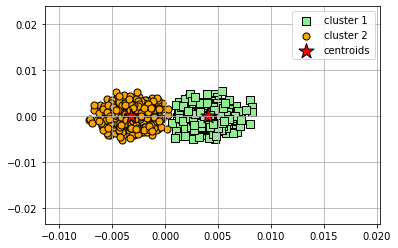

In [13]:
#kmeans for he0_pca
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300)
y_km1 = km.fit_predict(he0_pca)
plt.scatter(
    he0_pca[y_km1 == 0, 0], he0_pca[y_km1 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    he0_pca[y_km1 == 1, 0], he0_pca[y_km1 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#     he0_pca[y_km1 == 2, 0], he0_pca[y_km1 == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [14]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300)
y_km1 = km.fit_predict(he0_pca)
# y_km1 = km.fit_predict(he0_pca)

@ipywidgets.interact(ykm = [0,1],clus_center=['Clusters','Individual Cluster', 'Centroids'], figy=[5,10])
def plot(clus_center='Clusters',ykm=0, figy=5):
    plt.subplots(figsize=(8,figy))        
#     fig, ax = plt.subplots(figsize=(4,figy))
#     CAX = ax.imshow(michigan, cmap=colormap, norm=norm) # saving the image in a way for colorbar
#     plt.colorbar(CAX) # using our image to make the colorbar
#     plt.show()
    if(clus_center=='Clusters'):
        plt.scatter(
        he0_pca[y_km1 == 0, 0], he0_pca[y_km1 == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
        )

        plt.scatter(
            he0_pca[y_km1 == 1, 0], he0_pca[y_km1 == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2'
        )
    elif(clus_center == 'Individual Cluster'):
        plt.scatter(
        he0_pca[y_km1 == ykm, 0], he0_pca[y_km1 == ykm, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
        )
    else:
        plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
        )

#     filter_data = data.loc[data['State'] == state]
#     plt.ion()
#     fig, ax = plt.subplots()
#     fig.canvas.layout.width='800px'
#     fig.canvas.layout.height='600px'
#     ax.bar(filter_data['Hospital Type'].unique(), filter_data['Hospital Type'].value_counts(), align='center', alpha=0.5, color='blue')
#     ax.set_ylabel('Frequency')
#     fig.suptitle('Total Records per Device for '+state)
#     fig.show()
    
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

interactive(children=(Dropdown(description='clus_center', options=('Clusters', 'Individual Cluster', 'Centroid…

The above visualization with some interactive option selection. In the drop down menus we can select to see individual or both the clusters. The clusters are formed using K-means clustering algorithm and PCA feature reduction technique to reduce into 2-D space.
Here we can select cluster type, cluster label and figure size interatively. 

In [15]:
#performing t-sne feature reduction  
he0_tsne = TSNE(random_state= 42,n_components=2).fit_transform(he0.drop('Microbe Name', axis =1).transpose())


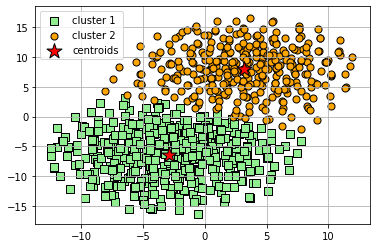

In [16]:
y_km3 = km.fit_predict(he0_tsne)
plt.scatter(
    he0_tsne[y_km3 == 0, 0], he0_tsne[y_km3 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    he0_tsne[y_km3 == 1, 0], he0_tsne[y_km3 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#     he0_pca[y_km1 == 2, 0], he0_pca[y_km1 == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [17]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300)
y_km1 = km.fit_predict(he0_pca)

he0_tsne = TSNE(random_state= 42,n_components=2).fit_transform(he0.drop('Microbe Name', axis =1).transpose())
@ipywidgets.interact(reduction_method = ['PCA', 'TSNE'], figy=[5,10])
def plot(reduction_method='PCA', figy=5):
    plt.subplots(figsize=(8,figy))          
#     fig, ax = plt.subplots(figsize=(4,figy))
#     CAX = ax.imshow(michigan, cmap=colormap, norm=norm) # saving the image in a way for colorbar
#     plt.colorbar(CAX) # using our image to make the colorbar
#     plt.show()

    if(reduction_method=='PCA'):
        plt.scatter(
        he0_pca[y_km1 == 0, 0], he0_pca[y_km1 == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
        )

        plt.scatter(
            he0_pca[y_km1 == 1, 0], he0_pca[y_km1 == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2'
        )

        # plt.scatter(
        #     he0_pca[y_km1 == 2, 0], he0_pca[y_km1 == 2, 1],
        #     s=50, c='lightblue',
        #     marker='v', edgecolor='black',
        #     label='cluster 3'
        # )

        # plot the centroids
        plt.scatter(
            km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
        
    else:
        plt.scatter(
        he0_tsne[y_km3 == 0, 0], he0_tsne[y_km3 == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
        )

        plt.scatter(
            he0_tsne[y_km3 == 1, 0], he0_tsne[y_km3 == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2'
        )

        # plt.scatter(
        #     he0_pca[y_km1 == 2, 0], he0_pca[y_km1 == 2, 1],
        #     s=50, c='lightblue',
        #     marker='v', edgecolor='black',
        #     label='cluster 3'
        # )

        # plot the centroids
        plt.scatter(
            km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
        
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

#     filter_data = data.loc[data['State'] == state]
#     plt.ion()
#     fig, ax = plt.subplots()
#     fig.canvas.layout.width='800px'
#     fig.canvas.layout.height='600px'
#     ax.bar(filter_data['Hospital Type'].unique(), filter_data['Hospital Type'].value_counts(), align='center', alpha=0.5, color='blue')
#     ax.set_ylabel('Frequency')
#     fig.suptitle('Total Records per Device for '+state)
#     fig.show()

interactive(children=(Dropdown(description='reduction_method', options=('PCA', 'TSNE'), value='PCA'), Dropdown…

In this visualization we can select the feature reduction technique and check the clusters formed using K-means algorithm on the go.